                                     Challenge 6

The leaky integrate–and–ﬁre neuron has the form
            τmu′ = −u + RI(t)
Set τm = 10ms and R = 500MΩ. Set the threshold at 20 mV . Remember that the voltage needs to be reset once the threshold is reached. You do not need to use a refractory period.

(a) Assume the input is described by a Poisson process. Compute the ﬁring rate as a function of the input rate, assuming that the weight of each synapse is w = 1, with current measured in pA. Assume that each input spike results in an instant depolarization. As a result model the eﬀect of each spike as an instantaneous increase in the membrane potential by Δu = 0.5mV . You can compute the output rate by recording the times between consecutive spikes, and dividing by the total number of spikes.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# define τm, R, threshold and Δu
tau=10*10**(-3)  # τm=10ms
R=500*10**6     # R = 500MΩ
threshold=20*10**(-3)   # threshold=20mV
delta_u=0.5*10**(-3)    # Δu = 0.5mV

# the possion process event has exponential distribution interval
# generate a set of parameters lamda for the exponential distribution
lamda=np.arange(1*10**(-5),3*10**(-4),10**(-5)) # 29 lamda 

# discrete increments resolution  
delta_t=[0.01*10**(-3), 0.02*10**(-3), 0.05*10**(-3)]   


In [3]:
firrate_dt={}
u_dt={}
t_dt={}
for ddt in delta_t:
    t0=0
    u0=0
    firingrate=np.zeros(len(lamda)) 
    u_lamda=[]
    t_lamda=[]
    for ii in range(len(lamda)):

        tf=[]  # firing time
        # generate 10000 spikes for each lamda
        t_spike=np.random.exponential(lamda[ii],10000)
        N=math.ceil(np.sum(t_spike)/ddt)  # number of discrete time increments
        t=np.zeros(N)
        u=np.zeros(N)
        i=0  # the number of the increment
        j=0   # the number of the spike
        du_dt=0

        t_dur=0

        for i in range(1,N):
            t[i]=t[i-1]+ddt
            u[i]=u[i-1]+du_dt*ddt
            t_dur=t_dur+ddt
            if u[i-1]>=threshold:
                u[i]=u0
                du_dt=0
                tf.append(t[i-1])

            else:
                if t_dur>=t_spike[j]:
                    nspike=0
                    t_dur_spike=t_spike[j]
                    while t_dur>=t_dur_spike:
                        j+=1
                        nspike+=1
                        t_dur_spike=t_dur_spike+t_spike[j]
                    u[i]=u[i]+nspike*delta_u
                    t_dur=t_dur-(t_dur_spike-t_spike[j])

                du_dt=-u[i]/tau

        firingrate[ii]=1/((tf[-1]-tf[0])/(len(tf)-1))
        u_lamda.append(u)
        t_lamda.append(t)
    DataName='dt_'+str(ddt)
    firrate_dt[DataName]=firingrate
    u_dt[DataName]=u_lamda
    t_dt[DataName]=t_lamda

Text(0.5, 1.0, 'Firing Rate')

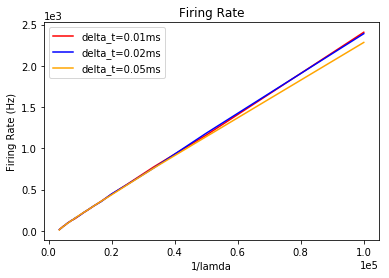

In [4]:
plt.plot(1/lamda,firrate_dt['dt_1e-05'], 'red', label='delta_t=0.01ms')
plt.plot(1/lamda,firrate_dt['dt_2e-05'], 'blue', label='delta_t=0.02ms')
plt.plot(1/lamda,firrate_dt['dt_5e-05'], 'orange', label='delta_t=0.05ms')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlabel('1/lamda')
plt.ylabel('Firing Rate (Hz)')
plt.legend()
plt.title('Firing Rate')

Text(0.5, 1.0, 'Spike train for lamda=2.1e-4, delta_t=0.01ms')

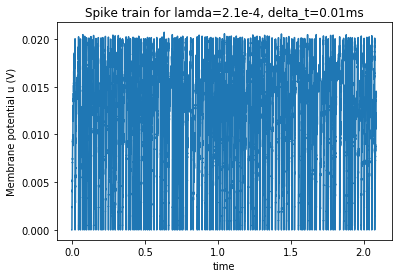

In [5]:
plt.plot(t_dt['dt_1e-05'][20],u_dt['dt_1e-05'][20])
plt.xlabel('time')
plt.ylabel('Membrane potential u (V)')
plt.title('Spike train for lamda=2.1e-4, delta_t=0.01ms')

Text(0.5, 1.0, 'Spike train for lamda=3e-4, delta_t=0.01ms')

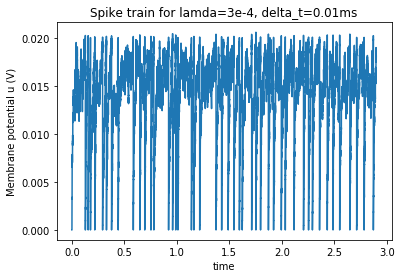

In [6]:
plt.plot(t_dt['dt_1e-05'][28],u_dt['dt_1e-05'][28])
plt.xlabel('time')
plt.ylabel('Membrane potential u (V)')
plt.title('Spike train for lamda=3e-4, delta_t=0.01ms')

Text(0.5, 1.0, 'Spike train for lamda=2.1e-4, delta_t=0.02ms')

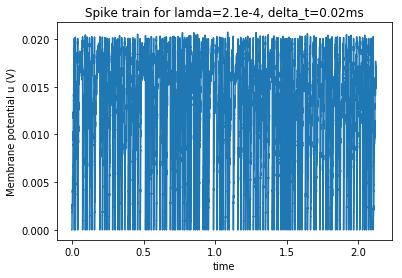

In [7]:
plt.plot(t_dt['dt_2e-05'][20],u_dt['dt_2e-05'][20])
plt.xlabel('time')
plt.ylabel('Membrane potential u (V)')
plt.title('Spike train for lamda=2.1e-4, delta_t=0.02ms')

Text(0.5, 1.0, 'Spike train for lamda=3e-4, delta_t=0.02ms')

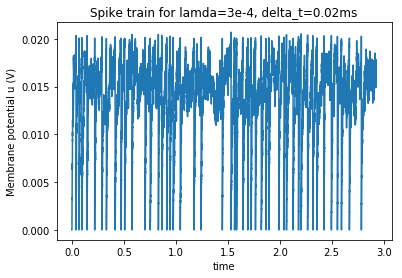

In [8]:
plt.plot(t_dt['dt_2e-05'][28],u_dt['dt_2e-05'][28])
plt.xlabel('time')
plt.ylabel('Membrane potential u (V)')
plt.title('Spike train for lamda=3e-4, delta_t=0.02ms')

Text(0.5, 1.0, 'Spike train for lamda=2.1e-4, delta_t=0.05ms')

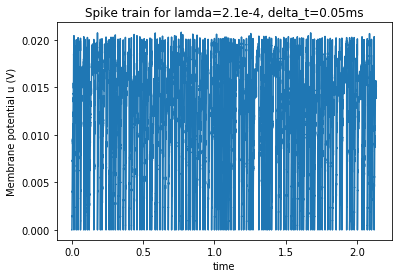

In [9]:
plt.plot(t_dt['dt_5e-05'][20],u_dt['dt_5e-05'][20])
plt.xlabel('time')
plt.ylabel('Membrane potential u (V)')
plt.title('Spike train for lamda=2.1e-4, delta_t=0.05ms')

Text(0.5, 1.0, 'Spike train for lamda=3e-4, delta_t=0.05ms')

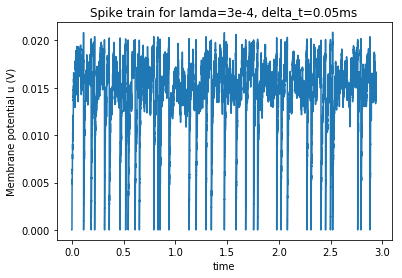

In [10]:
plt.plot(t_dt['dt_5e-05'][28],u_dt['dt_5e-05'][28])
plt.xlabel('time')
plt.ylabel('Membrane potential u (V)')
plt.title('Spike train for lamda=3e-4, delta_t=0.05ms')